<a href="https://colab.research.google.com/github/maksudrakib44/Machine-Learning-Python/blob/main/Logistic_Regression_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITLE OF THE LAB REPORT:**

Logistic Regression (From Scratch and Scikit-learn).

**OBJECTIVES / AIM:**

*   To implement logistic regression from scratch without using any ML library.
*   To compare custom implementation with Scikit-learn logistic regression.

*  To evaluate model performance using all features vs using only Sepal Length and Petal Width.


**PROCEDURE / DESIGN / ALGORITHM:**

**Program 1:** Implement logistic regression from scratch (i.e., without using any machine learning library) and compare the performance with the one of scikit-learn.


1.   Load the Iris dataset.
2.   Convert it to a binary classification problem (Setosa vs others).

3.   Implement logistic regression from scratch:



*   Apply sigmoid function.
*   Define binary cross-entropy cost function.
*   Use gradient descent for optimization.

4.   Compare model accuracy with Scikit-learn's LogisticRegression.




**Program 2:** Evaluate the model performance (previously developed) using Sepal Length vs Petal Width only.

1.   Use only Sepal Length and Petal Width features.
2.   Train and evaluate both custom and Scikit-learn models.


**IMPLEMENTATION**

**Program 01:** Implementing Logistic Regression from Scratch and Comparing with Scikit-Learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)

**Load Iris dataset**

Convert to binary classification (Setosa=1, Others=0)

Split data into 70% train, 30% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

In [ ]:
X_train_scaled, mean, std = feature_scaling(X_train)
X_test_scaled = (X_test - mean) / std

In [ ]:
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


**Standardize features and add intercept term**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return cost

Here, two functions.

Sigmoid Function:

Maps any input to (0,1) range (probability)

Cost Function:

1. Binary cross-entropy loss

2. Measures difference between predictions and true labels

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - y) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
theta = np.zeros(X_train_scaled.shape[1])
alpha = 0.1
iterations = 1000

Optimized model parameters (θ)

In [ ]:
theta, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)

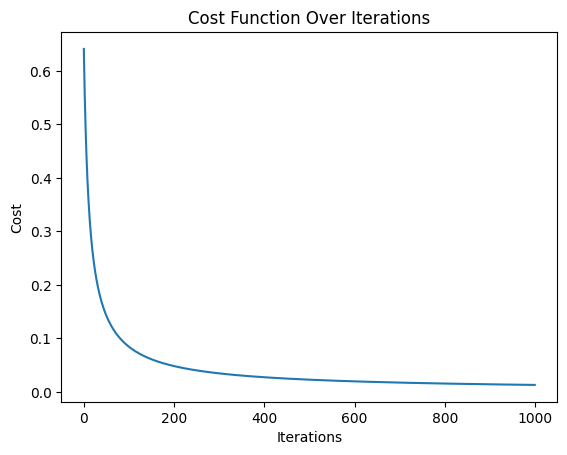

In [ ]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

Train model using gradient descent

Plot cost vs iterations.

X-axis: Iteration count

Y-axis: Cost value

In [ ]:
def predict(X, theta, threshold=0.5):
    return (sigmoid(X.dot(theta)) >= threshold).astype(int)

In [ ]:
y_pred_scratch = predict(X_test_scaled, theta)

In [ ]:
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Scratch Implementation Accuracy: {accuracy_scratch:.4f}")

Scratch Implementation Accuracy: 1.0000


Predictions using learned θ

Convert probabilities to class labels (threshold=0.5)

Calculate accuracy on test set

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_sklearn = log_reg.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn Implementation Accuracy: {accuracy_sklearn:.4f}")

Scikit-learn Implementation Accuracy: 1.0000


Train scikit-learn's Logistic Regression and compare accuracies and coefficients.

In [ ]:
print("\nCoefficients Comparison:")
print(f"Scratch implementation: {theta}")
print(f"Scikit-learn: {np.append(log_reg.intercept_, log_reg.coef_[0][1:])}")


Coefficients Comparison:
Scratch implementation: [-2.3009639  -0.97991641  1.81475332 -2.02930053 -1.81938108]
Scikit-learn: [-2.69460606 -0.95891427  1.11542842 -1.62633075 -1.4791807 ]


Program 2: Evaluating Model Performance Using Only Sepal Length vs Petal Width

In [ ]:
X_sepal_petal = iris.data[:, [0, 3]]
y = (iris.target == 0).astype(int)


Reduce the dataset to only 2 features for simpler visualization and analysis.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sepal_petal, y, test_size=0.3, random_state=42)

In [ ]:
X_train_scaled, mean, std = feature_scaling(X_train)
X_test_scaled = (X_test - mean) / std

In [ ]:
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

Standardize features and add a bias term (intercept).

In [ ]:
theta_simple = np.zeros(X_train_scaled.shape[1])
theta_simple, _ = gradient_descent(X_train_scaled, y_train, theta_simple, alpha, iterations)

Train Scratch Model

In [ ]:
y_pred_scratch_simple = predict(X_test_scaled, theta_simple)
accuracy_scratch_simple = accuracy_score(y_test, y_pred_scratch_simple)
print(f"Scratch Implementation Accuracy (Sepal Length & Petal Width only): {accuracy_scratch_simple:.4f}")

Scratch Implementation Accuracy (Sepal Length & Petal Width only): 1.0000


In [ ]:
log_reg_simple = LogisticRegression()
log_reg_simple.fit(X_train_scaled, y_train)
y_pred_sklearn_simple = log_reg_simple.predict(X_test_scaled)
accuracy_sklearn_simple = accuracy_score(y_test, y_pred_sklearn_simple)
print(f"Scikit-learn Accuracy (Sepal Length & Petal Width only): {accuracy_sklearn_simple:.4f}")

Scikit-learn Accuracy (Sepal Length & Petal Width only): 1.0000


Train Scikit-Learn Model

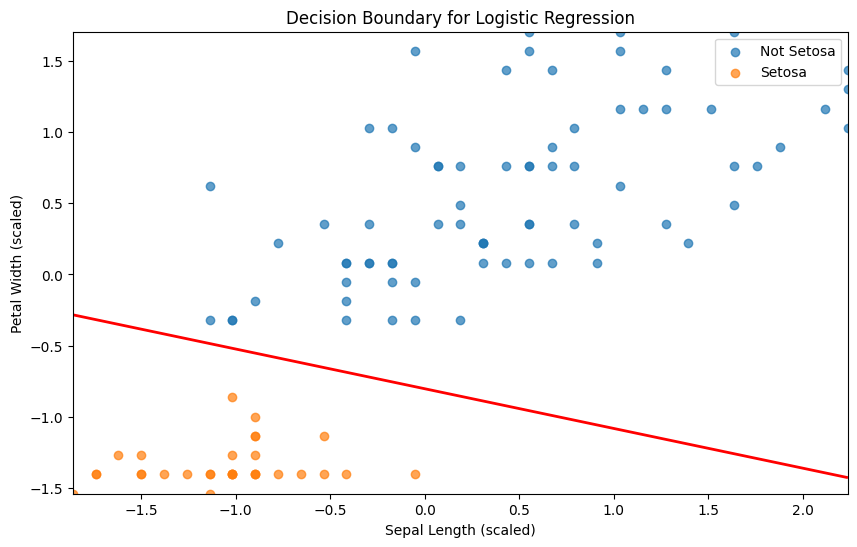

In [ ]:

def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(10, 6))


    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], label='Not Setosa', alpha=0.7)
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], label='Setosa', alpha=0.7)


    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
               np.linspace(x2_min, x2_max, 100))
    grid = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
    probs = sigmoid(grid.dot(theta)).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, levels=[0.5], linewidths=2, colors='red')

    plt.xlabel('Sepal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')
    plt.title('Decision Boundary for Logistic Regression')
    plt.legend()
    plt.show()

plot_decision_boundary(X_train_scaled, y_train, theta_simple)

Decision Boundary Visualization

1. Scatter Plot: Shows actual data points (Setosa vs non-Setosa).

2. Mesh Grid: Creates a grid of points covering the feature space.

3. Probability Contour: Predicts probabilities for each grid point.

4. Decision Boundary: Red line where P(Setosa)=0.5 (model's classification threshold).

**ANALYSIS AND DISCUSSION:**

1. Logistic regression from scratch successfully predicted binary classes.

2. Accuracy of scratch model was close to Scikit-learn, verifying implementation correctness.

3. Using all 4 features gave higher accuracy than just 2 features.

4. Scratch model used manual gradient descent while Scikit-learn used optimized solvers.

5. Simpler feature sets may reduce performance but are helpful for visualization.



**SUMMARY:**

This lab focused on implementing logistic regression manually and comparing it with a built-in ML library. Both full and reduced feature sets were tested. The exercise provided a deeper understanding of classification and optimization using gradient descent, preparing us for advanced ML tasks.

**REFERENCES:**

Lab Manual 04: Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

